In [3]:
# finished.jsonの読み込み
import json
json_open = open("./final_product/data/finished.json", "r")
json_load = json.load(json_open)
print(len(json_load))
print(json_load[1])

219
{'company_name': '伊藤忠テクノソリューションズ株式会社', 'company_code': '4739.T', 'category_original': 'IT', 'category_new': 'IT', 'value': [['2001-01', '0'], ['2001-02', '0'], ['2001-03', '0'], ['2001-04', '0'], ['2001-05', '0'], ['2001-06', '0'], ['2001-07', '0'], ['2001-08', '0'], ['2001-09', '0'], ['2001-10', '0'], ['2001-11', '0'], ['2001-12', '0'], ['2002-01', '0'], ['2002-02', '0'], ['2002-03', '0'], ['2002-04', '0'], ['2002-05', '0'], ['2002-06', '0'], ['2002-07', '0'], ['2002-08', '0'], ['2002-09', '0'], ['2002-10', '0'], ['2002-11', '0'], ['2002-12', '0'], ['2003-01', '0'], ['2003-02', '0'], ['2003-03', '0'], ['2003-04', '0'], ['2003-05', '0'], ['2003-06', '0'], ['2003-07', '0'], ['2003-08', '0'], ['2003-09', '0'], ['2003-10', '0'], ['2003-11', '0'], ['2003-12', '0'], ['2004-01', '0'], ['2004-02', '0'], ['2004-03', '0'], ['2004-04', '0'], ['2004-05', '0'], ['2004-06', '0'], ['2004-07', '0'], ['2004-08', '0'], ['2004-09', '0'], ['2004-10', '0'], ['2004-11', '0'], ['2004-12', '0'], ['2005-0

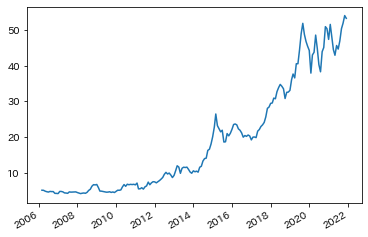

In [8]:
# グラフの描画
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import japanize_matplotlib

for i in range(len(json_load)):
    info = json_load[i]
    code = info["company_code"]
    x = []
    y = []
    for j in range(len(info["value"])):
        if(float(info["value"][j][1]) != 0):
            year, month = info["value"][j][0].split("-")
            x.append(pd.to_datetime(year+"-"+month))
            y.append(float(info["value"][j][1]))
    fig = plt.figure()
    fig.patch.set_alpha(1)
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,y)
    plt.gcf().autofmt_xdate()
    # ax.set_title("時価総額（米十億ドル）")
    # plt.show()
    # fig.savefig("./graph_image/"+code+".png")
    break

In [13]:
# 順位情報の保存
for i in range(len(json_load[0]["value"])):
    ranking = []
    for j in range(len(json_load)):
        ranking.append([float(json_load[j]["value"][i][1]), json_load[j]["company_code"]])
    ranking.sort(reverse=True)
    
    for rank in range(len(ranking)):
        for company in range(len(json_load)):
            if(ranking[rank][1] == json_load[company]["company_code"]):
                json_load[company]["value"][i].append(rank+1)
print(json_load)

[{'company_name': '株式会社オリエンタルランド', 'company_code': '4661.T', 'category_original': 'サービス業', 'category_new': 'サービス業', 'value': [['2001-01', '0', 164], ['2001-02', '0', 164], ['2001-03', '0', 164], ['2001-04', '0', 164], ['2001-05', '0', 164], ['2001-06', '0', 164], ['2001-07', '0', 164], ['2001-08', '0', 164], ['2001-09', '0', 164], ['2001-10', '0', 164], ['2001-11', '0', 164], ['2001-12', '0', 164], ['2002-01', '0', 164], ['2002-02', '0', 164], ['2002-03', '0', 165], ['2002-04', '0', 165], ['2002-05', '0', 165], ['2002-06', '0', 165], ['2002-07', '0', 165], ['2002-08', '0', 165], ['2002-09', '0', 165], ['2002-10', '0', 165], ['2002-11', '0', 165], ['2002-12', '0', 165], ['2003-01', '0', 165], ['2003-02', '0', 165], ['2003-03', '0', 167], ['2003-04', '0', 167], ['2003-05', '0', 167], ['2003-06', '0', 167], ['2003-07', '0', 167], ['2003-08', '0', 167], ['2003-09', '0', 167], ['2003-10', '0', 167], ['2003-11', '0', 167], ['2003-12', '0', 168], ['2004-01', '0', 168], ['2004-02', '0', 168], 

In [15]:
# with open("test.json", "w") as f:
#     json.dump(json_load, f , indent=4, ensure_ascii=False)